In [96]:
using Distributions, Plots, LinearAlgebra, DataStructures, StatsBase;

In [146]:
function minimumSpanningTree(X, norm = (x,v)-> sum((x-v).^2))
    n,m = size(X)
    A = zeros(Int, n-1, 2)
    WerificationMatrix = falses(n,n)
    weights = zeros(n-1)
    in_set = falses(n)
    
    # Inicjalizacja
    
    ## pierwszy wierzchołek
    in_set[1] = true
    
    ## Macierz dystansów z.B
    # [Inf  1    2]
    # [1   Inf   2]
    # [2   2   Inf]
    
    dist = repeat([Inf],n,n)
    for i in 2:n
        for j in 1:(i-1)
            d = norm(X[i,:],X[j,:])
            dist[i,j] = d
            dist[j,i] = d
        end
    end
    
    for i in 1:(n-1)
        # znaleźć najbliższy
        amin = argmin(dist[in_set, .!in_set])
        
        A[i, :] = [findall(in_set)[amin[1]], findall(.!in_set)[amin[2]]]
        
        
        weights[i] = dist[in_set, .!in_set][amin]
        
        @views WerificationMatrix[in_set, .!in_set][amin] = true
        @views in_set[.!in_set][amin[2]] = true 
    end
    
    
    
    return A, weights
end

minimumSpanningTree (generic function with 2 methods)

In [183]:
function gini(y, sorted = false)
    if !sorted
        sort!(y)
    end
    n = length(y)
    return (2*(1:n) .- n .- 1)'*y / n^2 / mean(y)
end

gini (generic function with 2 methods)

0. Input: x
(1)
, . . . , x
(n) – n objects, g ∈ (0, 1] – inequity index threshold,
d – a dissimilarity measure;
1. ds = DisjointSets({1}, {2}, . . . , {n});
2. m = MST(x
(1)
, . . . , x
(n)
); /* see Theorem 1 */
3. pq = MinPriorityQueue<PQItem>(∅);
/* PQItem structure: (index1, index2, dist);
pq returns the element with the smallest dist */
4. for each weighted edge (i, j, di, j) in m:
4.1. pq.push(PQItem(i, j,di, j));
5. for j = 1, 2, . . . , n − 1:
5.1. if ds.compute_inequity() ≤ g: /* e.g., the Gini-index */
5.1.1. t = pq.pop(); /* PQItem with the least dist */
else:
5.1.2. t = pq.pop_conditional 
t: ds.size(t.index1) = ds.min_size()
or ds.size(t.index2) = ds.min_size()
;
/* PQItem with the least dist that fulfills the given logical condition */
5.2. s1 = ds.find_set(t.index1);
5.3. s2 = ds.find_set(t.index2); /* assert: s1 , s2 */
5.4. output “linking (s1, s2)”;
5.5. ds.link(t.index1, t.index2);

In [196]:
function genie(X, g = Inf, dm = gini)
    n,m = size(X)
    ds = collect(1:n)
    a, w = minimumSpanningTree(X)
    
    # Budowanie Priority Queue
    pq = PriorityQueue{Tuple{Int64,Int64}, Float64}()
    for i in 1:(n-1)
        enqueue!(pq, (a[i,1], a[i,2]) => w[i]) 
    end
    
    for j in 1:n-1
        if gini(ds) <= g
            t_i = dequeue!(pq)
        else
            # Uwaga! To jeszcze nie działa, bo nie pamięta o usuniętych wcześniej krawędziach
            println("Ta pętla nie powinna działać!!!")
            min_class = argmin(countmap(ds)) # klasa najmniejszego
            indexes = (a[:,1] .== ind) .| (a[:,2] .== ind)
            amin = (1:n-1)[indexes][argmin(w[indexes])]
            
            t_i = (a[amin,1], a[amin,2])
            t_j = w[amin]

            t_i = delete!(pq, t_i)

        end
        
        s1 = ds[t_i[1]]
        s2 = ds[t_i[2]]
        
        # Połączenie klas
        ds[ds .== s2] .= s1
        println("Połączono klasę $s1 z $s2.")     
    end
    
    return ds
end

genie (generic function with 3 methods)

# Test

In [197]:
n = 1000
X = [rand(Normal(0,1), n, 2) ; rand(Normal(5,1), n, 2)];

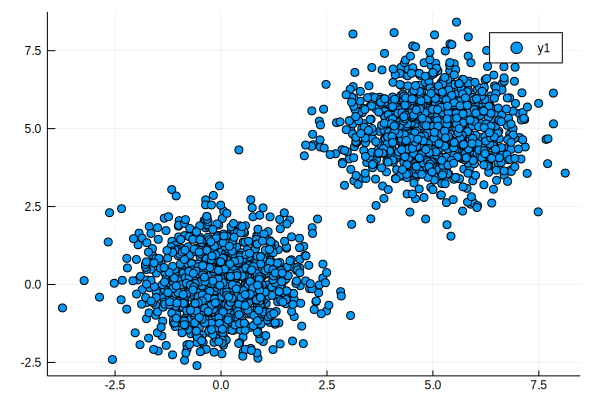

In [198]:
scatter(X[:,1], X[:,2])

In [199]:
labels = genie(X)

Połączono klasę 835 z 395.
Połączono klasę 549 z 810.
Połączono klasę 134 z 71.
Połączono klasę 1360 z 1216.
Połączono klasę 712 z 7.
Połączono klasę 1794 z 1912.
Połączono klasę 1842 z 1737.
Połączono klasę 226 z 388.
Połączono klasę 1371 z 1395.
Połączono klasę 1606 z 1243.
Połączono klasę 1715 z 1536.
Połączono klasę 1994 z 1880.
Połączono klasę 1293 z 1763.
Połączono klasę 174 z 528.
Połączono klasę 216 z 952.
Połączono klasę 1791 z 1437.
Połączono klasę 286 z 591.
Połączono klasę 1882 z 1503.
Połączono klasę 968 z 461.
Połączono klasę 1725 z 1791.
Połączono klasę 458 z 268.
Połączono klasę 1986 z 1867.
Połączono klasę 1519 z 1921.
Połączono klasę 1230 z 1240.
Połączono klasę 1366 z 1153.
Połączono klasę 47 z 841.
Połączono klasę 1349 z 1603.
Połączono klasę 421 z 343.
Połączono klasę 1058 z 1211.
Połączono klasę 1932 z 1027.
Połączono klasę 885 z 914.
Połączono klasę 1213 z 1074.
Połączono klasę 251 z 426.
Połączono klasę 1899 z 1621.
Połączono klasę 970 z 346.
Połączono klasę 569

Połączono klasę 10 z 701.
Połączono klasę 1726 z 1888.
Połączono klasę 434 z 233.
Połączono klasę 78 z 28.
Połączono klasę 46 z 989.
Połączono klasę 1988 z 1590.
Połączono klasę 787 z 80.
Połączono klasę 168 z 230.
Połączono klasę 1208 z 1349.
Połączono klasę 1379 z 1688.
Połączono klasę 1076 z 1804.
Połączono klasę 1292 z 1489.
Połączono klasę 1838 z 1533.
Połączono klasę 1151 z 1988.
Połączono klasę 1458 z 1490.
Połączono klasę 1732 z 1537.
Połączono klasę 602 z 87.
Połączono klasę 1138 z 1046.
Połączono klasę 509 z 623.
Połączono klasę 434 z 85.
Połączono klasę 920 z 237.
Połączono klasę 1193 z 1775.
Połączono klasę 1801 z 1494.
Połączono klasę 428 z 440.
Połączono klasę 516 z 422.
Połączono klasę 573 z 170.
Połączono klasę 1668 z 1492.
Połączono klasę 1296 z 1226.
Połączono klasę 1422 z 1214.
Połączono klasę 1653 z 1116.
Połączono klasę 1441 z 1151.
Połączono klasę 1406 z 1596.
Połączono klasę 1501 z 1881.
Połączono klasę 1342 z 1659.
Połączono klasę 543 z 62.
Połączono klasę 5 z 6

Połączono klasę 682 z 935.
Połączono klasę 1520 z 1149.
Połączono klasę 1889 z 1171.
Połączono klasę 16 z 481.
Połączono klasę 1178 z 1133.
Połączono klasę 1161 z 1462.
Połączono klasę 1339 z 1920.
Połączono klasę 593 z 444.
Połączono klasę 1877 z 1736.
Połączono klasę 12 z 641.
Połączono klasę 496 z 850.
Połączono klasę 913 z 16.
Połączono klasę 1780 z 1534.
Połączono klasę 478 z 558.
Połączono klasę 179 z 166.
Połączono klasę 836 z 667.
Połączono klasę 1110 z 1542.
Połączono klasę 860 z 261.
Połączono klasę 1861 z 1271.
Połączono klasę 127 z 124.
Połączono klasę 537 z 972.
Połączono klasę 1600 z 1843.
Połączono klasę 111 z 527.
Połączono klasę 1961 z 1831.
Połączono klasę 543 z 478.
Połączono klasę 1764 z 1877.
Połączono klasę 218 z 732.
Połączono klasę 355 z 886.
Połączono klasę 540 z 427.
Połączono klasę 1793 z 1245.
Połączono klasę 1520 z 1966.
Połączono klasę 1175 z 1893.
Połączono klasę 147 z 40.
Połączono klasę 1049 z 1579.
Połączono klasę 1850 z 1209.
Połączono klasę 1076 z 14

Połączono klasę 1524 z 1862.
Połączono klasę 1524 z 1181.
Połączono klasę 282 z 191.
Połączono klasę 1524 z 1410.
Połączono klasę 1472 z 1524.
Połączono klasę 464 z 111.
Połączono klasę 938 z 464.
Połączono klasę 938 z 902.
Połączono klasę 612 z 915.
Połączono klasę 1908 z 1931.
Połączono klasę 938 z 211.
Połączono klasę 1635 z 1570.
Połączono klasę 471 z 817.
Połączono klasę 11 z 349.
Połączono klasę 1261 z 1927.
Połączono klasę 1330 z 1996.
Połączono klasę 938 z 178.
Połączono klasę 492 z 671.
Połączono klasę 867 z 938.
Połączono klasę 1658 z 1372.
Połączono klasę 1222 z 1978.
Połączono klasę 1472 z 1081.
Połączono klasę 471 z 811.
Połączono klasę 863 z 131.
Połączono klasę 1874 z 1364.
Połączono klasę 1709 z 1520.
Połączono klasę 1811 z 1294.
Połączono klasę 941 z 11.
Połączono klasę 1472 z 1472.
Połączono klasę 867 z 213.
Połączono klasę 1261 z 1084.
Połączono klasę 1584 z 1088.
Połączono klasę 1472 z 1749.
Połączono klasę 1298 z 1237.
Połączono klasę 941 z 867.
Połączono klasę 517

Połączono klasę 942 z 522.
Połączono klasę 1963 z 1367.
Połączono klasę 1499 z 1465.
Połączono klasę 129 z 476.
Połączono klasę 1499 z 1348.
Połączono klasę 1521 z 1499.
Połączono klasę 942 z 72.
Połączono klasę 942 z 942.
Połączono klasę 942 z 942.
Połączono klasę 1521 z 1844.
Połączono klasę 219 z 862.
Połączono klasę 942 z 942.
Połączono klasę 1521 z 1254.
Połączono klasę 1521 z 1521.
Połączono klasę 942 z 942.
Połączono klasę 942 z 942.
Połączono klasę 1521 z 1521.
Połączono klasę 942 z 719.
Połączono klasę 157 z 942.
Połączono klasę 764 z 157.
Połączono klasę 1304 z 1009.
Połączono klasę 1521 z 1521.
Połączono klasę 1521 z 1521.
Połączono klasę 1521 z 1521.
Połączono klasę 1521 z 1521.
Połączono klasę 764 z 764.
Połączono klasę 1063 z 1521.
Połączono klasę 764 z 764.
Połączono klasę 282 z 764.
Połączono klasę 282 z 474.
Połączono klasę 1279 z 1874.
Połączono klasę 1063 z 1063.
Połączono klasę 282 z 282.
Połączono klasę 1063 z 1063.
Połączono klasę 1338 z 1063.
Połączono klasę 1338

Połączono klasę 1701 z 1701.
Połączono klasę 98 z 580.
Połączono klasę 98 z 578.
Połączono klasę 98 z 98.
Połączono klasę 98 z 98.
Połączono klasę 98 z 98.
Połączono klasę 98 z 98.
Połączono klasę 1701 z 1701.
Połączono klasę 1701 z 1701.
Połączono klasę 98 z 1701.


2000-element Array{Int64,1}:
    3
   12
   12
   20
   22
   23
   24
   33
   33
   33
   35
   35
   35
    ⋮
 1937
 1940
 1946
 1952
 1959
 1968
 1972
 1974
 1981
 1985
 1989
 1998

In [200]:
unique(labels)

327-element Array{Int64,1}:
    3
   12
   20
   22
   23
   24
   33
   35
   48
   55
   57
   67
   75
    ⋮
 1937
 1940
 1946
 1952
 1959
 1968
 1972
 1974
 1981
 1985
 1989
 1998

In [208]:
T = [[1,1,2,2] [1,2,1,2]]

4×2 Array{Int64,2}:
 1  1
 1  2
 2  1
 2  2

In [209]:
minimumSpanningTree(T)

([1 2; 1 3; 2 4], [1.0, 1.0, 1.0])